**Fetch Rewards Take Home Part 1**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [41]:
products_file = '/Users/etc1999/Downloads/PRODUCTS_TAKEHOME.csv'
transactions_file = '/Users/etc1999/Downloads/TRANSACTION_TAKEHOME.csv'
users_file = '/Users/etc1999/Downloads/USER_TAKEHOME.csv'

In [42]:
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)
users_df = pd.read_csv(users_file)

This block defines a function to calculate and visualize the proportion of missing values in any given dataset. It then uses this function to generate bar plots for missing values in the Products, Transactions, and Users datasets.

In [43]:
# Function to plot missing values
def plot_missing_values(df, title):
    missing = df.isnull().mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing.index, y=missing.values)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Proportion of Missing Values')
    plt.title(f'Missing Values in {title} Dataset')
    plt.show()


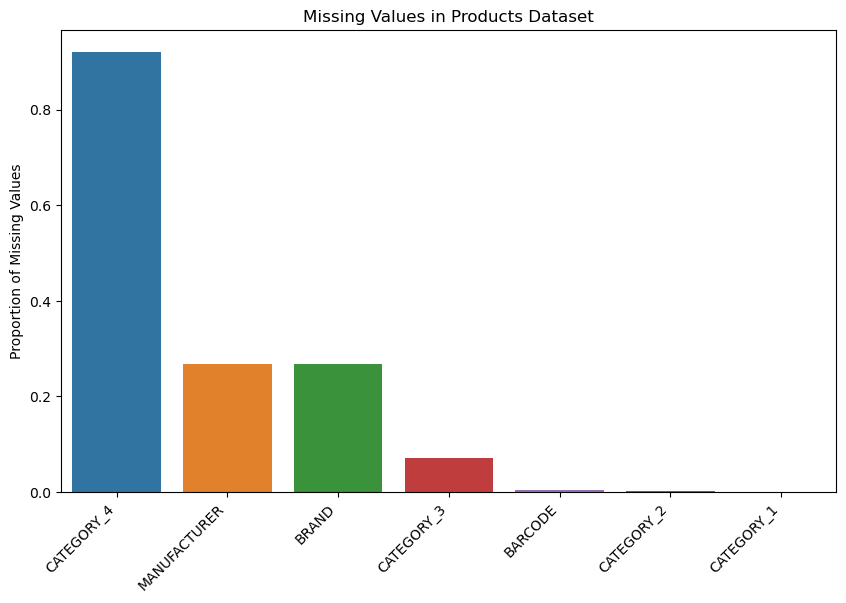

In [44]:
# Visualize missing values in each dataset
plot_missing_values(products_df, 'Products')

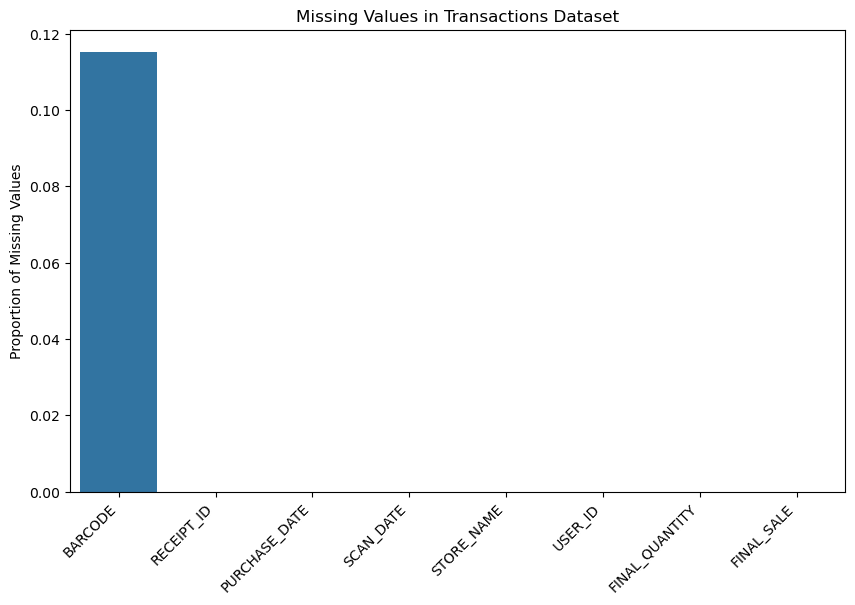

In [45]:
plot_missing_values(transactions_df, 'Transactions')

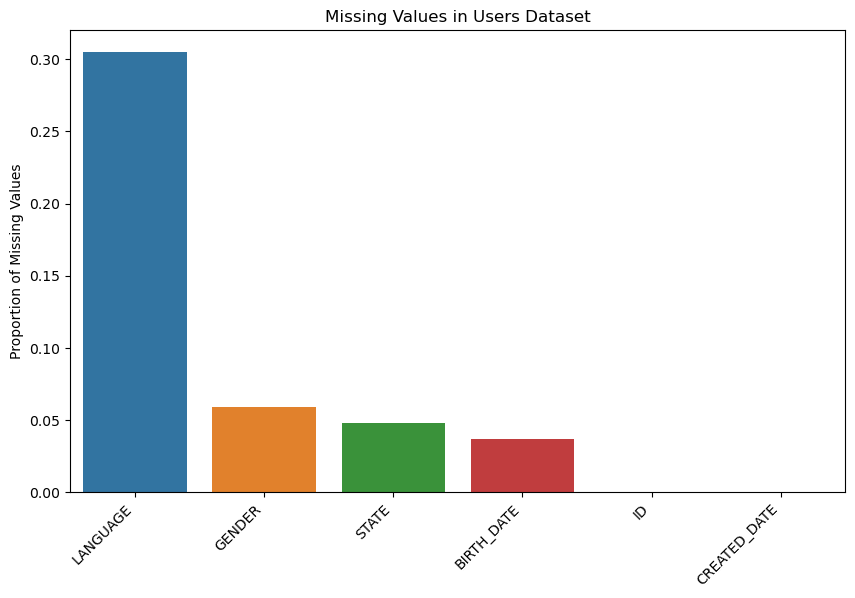

In [46]:
plot_missing_values(users_df, 'Users')

We check for duplicate records in each dataset and print the count. Duplicates could indicate data quality issues or errors during data collection.

In [47]:
print(f"Duplicates in Products Dataset: {products_df.duplicated().sum()}")
print(f"Duplicates in Transactions Dataset: {transactions_df.duplicated().sum()}")
print(f"Duplicates in Users Dataset: {users_df.duplicated().sum()}")

Duplicates in Products Dataset: 215
Duplicates in Transactions Dataset: 171
Duplicates in Users Dataset: 0


We examine unique values in specific columns to detect potential patterns or anomalies. For example, it looks at the distribution of FINAL_QUANTITY in Transactions and LANGUAGE in Users datasets.

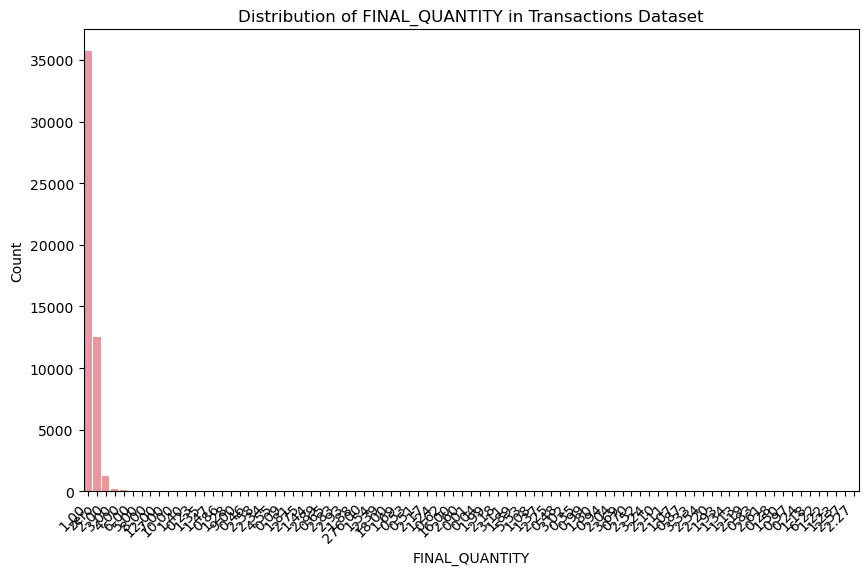

In [48]:
# Examine unique values in 'FINAL_QUANTITY' column of Transactions
final_quantity_counts = transactions_df['FINAL_QUANTITY'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=final_quantity_counts.index, y=final_quantity_counts.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Distribution of FINAL_QUANTITY in Transactions Dataset')
plt.show()

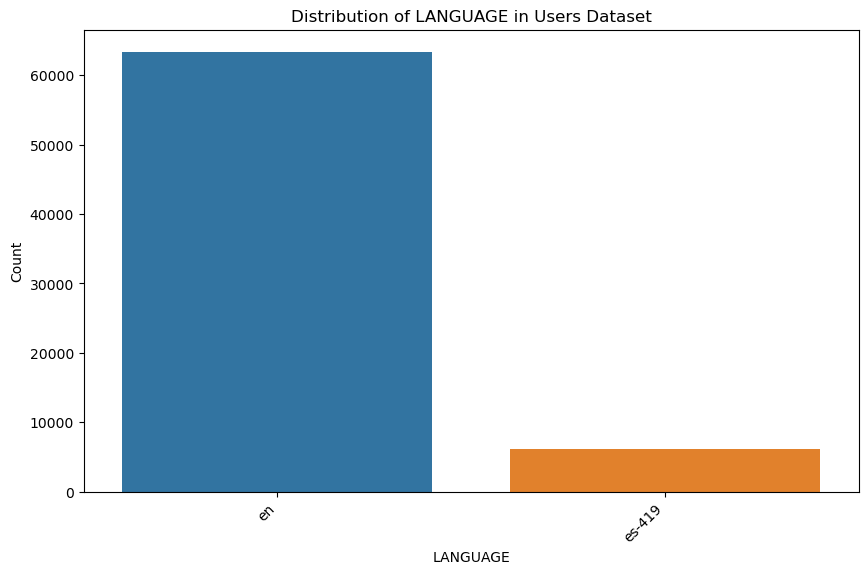

In [49]:
# Examine unique values in 'LANGUAGE' column of Users
language_counts = users_df['LANGUAGE'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Distribution of LANGUAGE in Users Dataset')
plt.show()

We convert date fields to proper datetime format and flag invalid dates by counting missing entries. It ensures all date columns are consistent and ready for analysis.

In [97]:
# Check for logical inconsistencies in date fields
# Convert to datetime and flag invalid formats
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'], errors='coerce')
transactions_df['SCAN_DATE'] = pd.to_datetime(transactions_df['SCAN_DATE'], errors='coerce')
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')

In [98]:
# Count invalid date entries
invalid_purchase_dates = transactions_df['PURCHASE_DATE'].isnull().sum()
invalid_scan_dates = transactions_df['SCAN_DATE'].isnull().sum()
invalid_birth_dates = users_df['BIRTH_DATE'].isnull().sum()

In [52]:
print("Missing Values in Products Dataset:")
print(products_df.isnull().sum())

Missing Values in Products Dataset:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [53]:
print("Missing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())

Missing Values in Transactions Dataset:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


In [54]:
print("Missing Values in Users Dataset:")
print(users_df.isnull().sum())

Missing Values in Users Dataset:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64


In [55]:
print("Basic Statistics for Products Dataset:")
print(products_df.describe())

Basic Statistics for Products Dataset:
            BARCODE
count  8.415270e+05
mean   6.016109e+11
std    1.022530e+12
min    1.850000e+02
25%    7.124923e+10
50%    6.344185e+11
75%    7.683955e+11
max    6.291108e+13


Now we calculate and displays summary statistics for each dataset to understand the data’s central tendencies and distribution.

In [56]:
print("Basic Statistics for Transactions Dataset:")
print(transactions_df.describe())

Basic Statistics for Transactions Dataset:
                    PURCHASE_DATE       BARCODE
count                       50000  4.423800e+04
mean   2024-07-24 09:44:17.664000  1.715863e+11
min           2024-06-12 00:00:00 -1.000000e+00
25%           2024-07-03 00:00:00  3.077212e+10
50%           2024-07-24 00:00:00  5.210004e+10
75%           2024-08-15 00:00:00  8.536765e+10
max           2024-09-08 00:00:00  9.347108e+12
std                           NaN  3.269219e+11


In [57]:
print("Basic Statistics for Users Dataset:")
print(users_df.describe())

Basic Statistics for Users Dataset:
                              ID               CREATED_DATE  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   
mean                         NaN                        NaN   
min                          NaN                        NaN   
25%                          NaN                        NaN   
50%                          NaN                        NaN   
75%                          NaN                        NaN   
max                          NaN                        NaN   

                                 BIRTH_DATE  STATE LANGUAGE  GENDER  
count                                 96325  95188    69492   94108  
unique                                  NaN     52        2      11  
top                                     NaN     TX       en 